In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

How does the road surface condition impact accident severity, considering other factors?
This question aims to explore the relationship between road surface conditions and accident severity while taking into account other relevant factors. By analyzing the "Road_Surface_Conditions" column, which contains categorical data, we can examine different road surface conditions such as dry, wet, icy, or snowy. To answer this question, we can use statistical methods such as logistic regression or chi-square tests to assess the association between road surface conditions and accident severity. Additionally, we can perform a multivariate analysis by including other variables like weather conditions, speed limit, or road type to better understand the impact of road surface conditions on accident severity while controlling for confounding variables.

Can we predict the number of casualties in an accident based on various factors using machine learning?
This question involves developing a predictive model to estimate the number of casualties in an accident using machine learning techniques. By treating the "Number_of_Casualties" column as the target variable and utilizing the other columns as features, we can apply regression algorithms such as linear regression, decision trees, or neural networks. To answer this question, we need to preprocess the data, handle missing values, encode categorical variables, and perform feature engineering if necessary. The model can then be trained and evaluated using appropriate metrics such as mean absolute error or root mean squared error. This analysis can provide insights into the factors that contribute to higher casualty counts and help in developing strategies for accident prevention and response.

Can we predict the likelihood of a fatal accident occurring at a specific location using machine learning?
This question involves building a predictive model to determine the likelihood of a fatal accident at a given location. By treating the "Accident_Severity" column as the target variable and utilizing spatial data such as longitude, latitude, and location details, we can employ techniques like spatial regression or geostatistical models. This analysis can help identify high-risk areas and provide insights for targeted interventions and safety measures. To answer this question, we need to preprocess the data, consider spatial dependencies, incorporate relevant spatial covariates (e.g., population density, road density), and select appropriate modeling approaches. The model's performance can be evaluated using metrics such as AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion).

In [2]:
accident2005 = pd.read_csv("data/accidents_2005_to_2007.csv", low_memory=False)
accident2009 = pd.read_csv("data/accidents_2009_to_2011.csv", low_memory=False)
accident2012 = pd.read_csv("data/accidents_2012_to_2014.csv", low_memory=False)

In [ ]:
accident2005.head(3)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005


In [ ]:
accident2009.head(3)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200901BS70001,524910,180800,-0.201349,51.512273,1,2,2,1,01/01/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002882,2009
1,200901BS70002,525050,181040,-0.199248,51.514399,1,2,2,11,05/01/2009,...,Zebra crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002886,2009
2,200901BS70003,526490,177990,-0.179599,51.486668,1,3,2,1,04/01/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002912,2009


In [ ]:
accident2012.head(3)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012


In [ ]:
accident2005.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [3]:
# Data cleaning

accident2005['Date'] = pd.to_datetime(accident2005['Date'],format='%d/%m/%Y')


In [4]:
accident2005['Weather_Conditions'].head(15)

0     Raining without high winds
1        Fine without high winds
2        Fine without high winds
3        Fine without high winds
4        Fine without high winds
5     Raining without high winds
6        Fine without high winds
7        Fine without high winds
8        Fine without high winds
9        Fine without high winds
10       Fine without high winds
11       Fine without high winds
12    Raining without high winds
13    Raining without high winds
14       Fine without high winds
Name: Weather_Conditions, dtype: object

In [5]:
unique_strings = accident2005['Weather_Conditions'].unique()
print(unique_strings)

['Raining without high winds' 'Fine without high winds' 'Unknown'
 'Snowing without high winds' 'Other' 'Fine with high winds'
 'Raining with high winds' 'Fog or mist' 'Snowing with high winds' nan]


# Question 1
How does the road surface condition impact accident severity, considering other factors? This question aims to explore the relationship between road surface conditions and accident severity while taking into account other relevant factors. By analyzing the "Road_Surface_Conditions" column, which contains categorical data, we can examine different road surface conditions such as dry, wet, icy, or snowy. To answer this question, we can use statistical methods such as logistic regression or chi-square tests to assess the association between road surface conditions and accident severity. Additionally, we can perform a multivariate analysis by including other variables like weather conditions, speed limit, or road type to better understand the impact of road surface conditions on accident severity while controlling for confounding variables.


## Notes
To answer the question, the important columns to note in this case would be the number of vehicles involved, the accident severity and the road surface conditions. The initial outlook, would be to see firstly how many accidents happened per road surface condition. Secondly, to see if there were more vehicles depending on condition. Thirdly, to find out if there's a correlation between road surface condition and accident severity.

In [6]:
q1_accident = pd.concat([accident2005, accident2009, accident2012], axis=0)
q1_accident = q1_accident[['Number_of_Vehicles', 'Accident_Severity', 'Road_Surface_Conditions']]


In [7]:
unique_strings = q1_accident['Road_Surface_Conditions'].unique()
print(unique_strings)

['Wet/Damp' 'Dry' 'Frost/Ice' 'Snow' 'Flood (Over 3cm of water)' nan]


In [8]:
total_len = len(q1_accident)

In [9]:
value_count = q1_accident['Road_Surface_Conditions'].value_counts(dropna=True)
value_counts = value_count
print(value_counts)

Dry                          1034670
Wet/Damp                      423477
Frost/Ice                      31405
Snow                           10497
Flood (Over 3cm of water)       2143
Name: Road_Surface_Conditions, dtype: int64


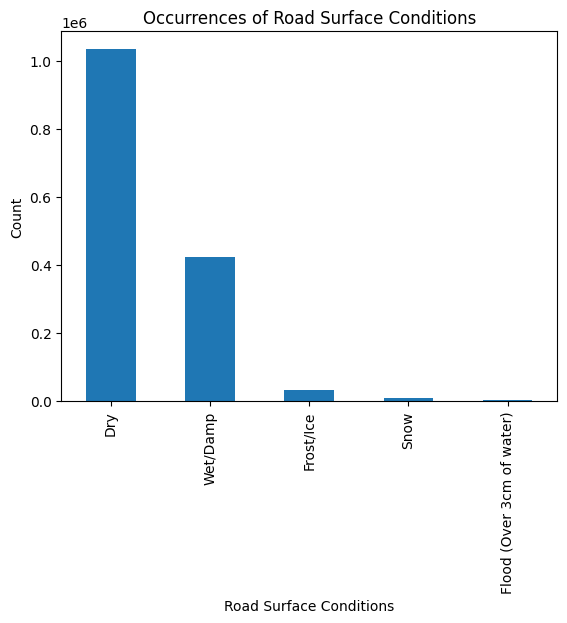

In [10]:
value_counts.plot(kind='bar')

plt.xlabel('Road Surface Conditions')
plt.ylabel('Count')
plt.title('Occurrences of Road Surface Conditions')

plt.show()

We can assume that dry weather means that the weather had little to no effect on the accident. So we will drop this from the chart.

In [11]:
value_counts = value_counts.drop('Dry')
value_counts

Wet/Damp                     423477
Frost/Ice                     31405
Snow                          10497
Flood (Over 3cm of water)      2143
Name: Road_Surface_Conditions, dtype: int64

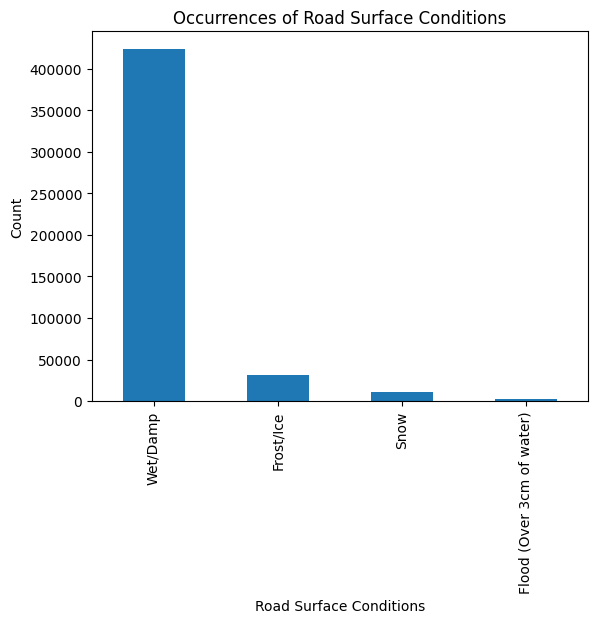

In [12]:
value_counts.plot(kind='bar')

plt.xlabel('Road Surface Conditions')
plt.ylabel('Count')
plt.title('Occurrences of Road Surface Conditions')

plt.show()

In [13]:
percentages = {'Dry': 0, 'Wet/Damp': 0, 'Frost/Ice': 0, 'Snow': 0, 'Flood (Over 3cm of water)': 0}
for value, count in value_count.items():
  percentages[value] = (count / total_len) * 100

print(percentages)

{'Dry': 68.78768739819832, 'Wet/Damp': 28.153907522521028, 'Frost/Ice': 2.087890170528205, 'Snow': 0.6978692284679054, 'Flood (Over 3cm of water)': 0.14247249277000298}


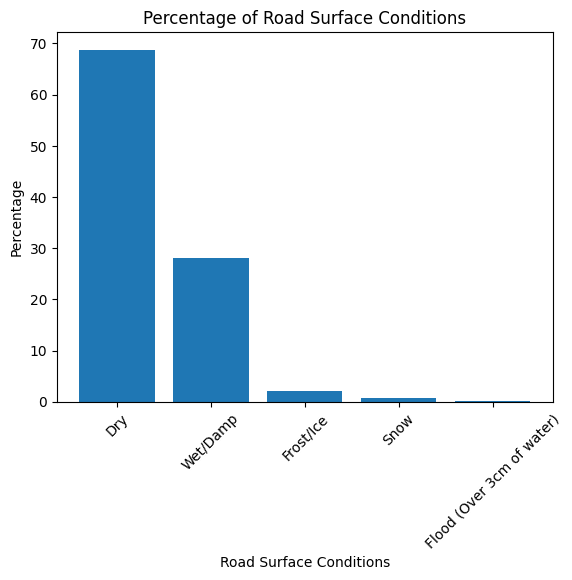

In [14]:

plt.bar(percentages.keys(), percentages.values())

plt.xlabel('Road Surface Conditions')
plt.ylabel('Percentage')
plt.title('Percentage of Road Surface Conditions')

plt.xticks(rotation=45)


plt.show()

From this, we can see as a percentage, most the accidents were in Dry weather, we can assume that dry weather = no weather conditions. We will now look to see if the weather conditions impacted the number of vehicles in the accident.

In [ ]:
grouped = q1_accident.groupby('Road_Surface_Conditions')['Number_of_Vehicles'].value_counts()
grouped.head(30)

Road_Surface_Conditions    Number_of_Vehicles
Dry                        2                     632234
                           1                     298368
                           3                      81378
                           4                      17088
                           5                       3758
                           6                       1164
                           7                        379
                           8                        164
                           9                         70
                           10                        38
                           11                        11
                           12                         5
                           13                         3
                           14                         2
                           18                         2
                           15                         1
                           16                         1
  

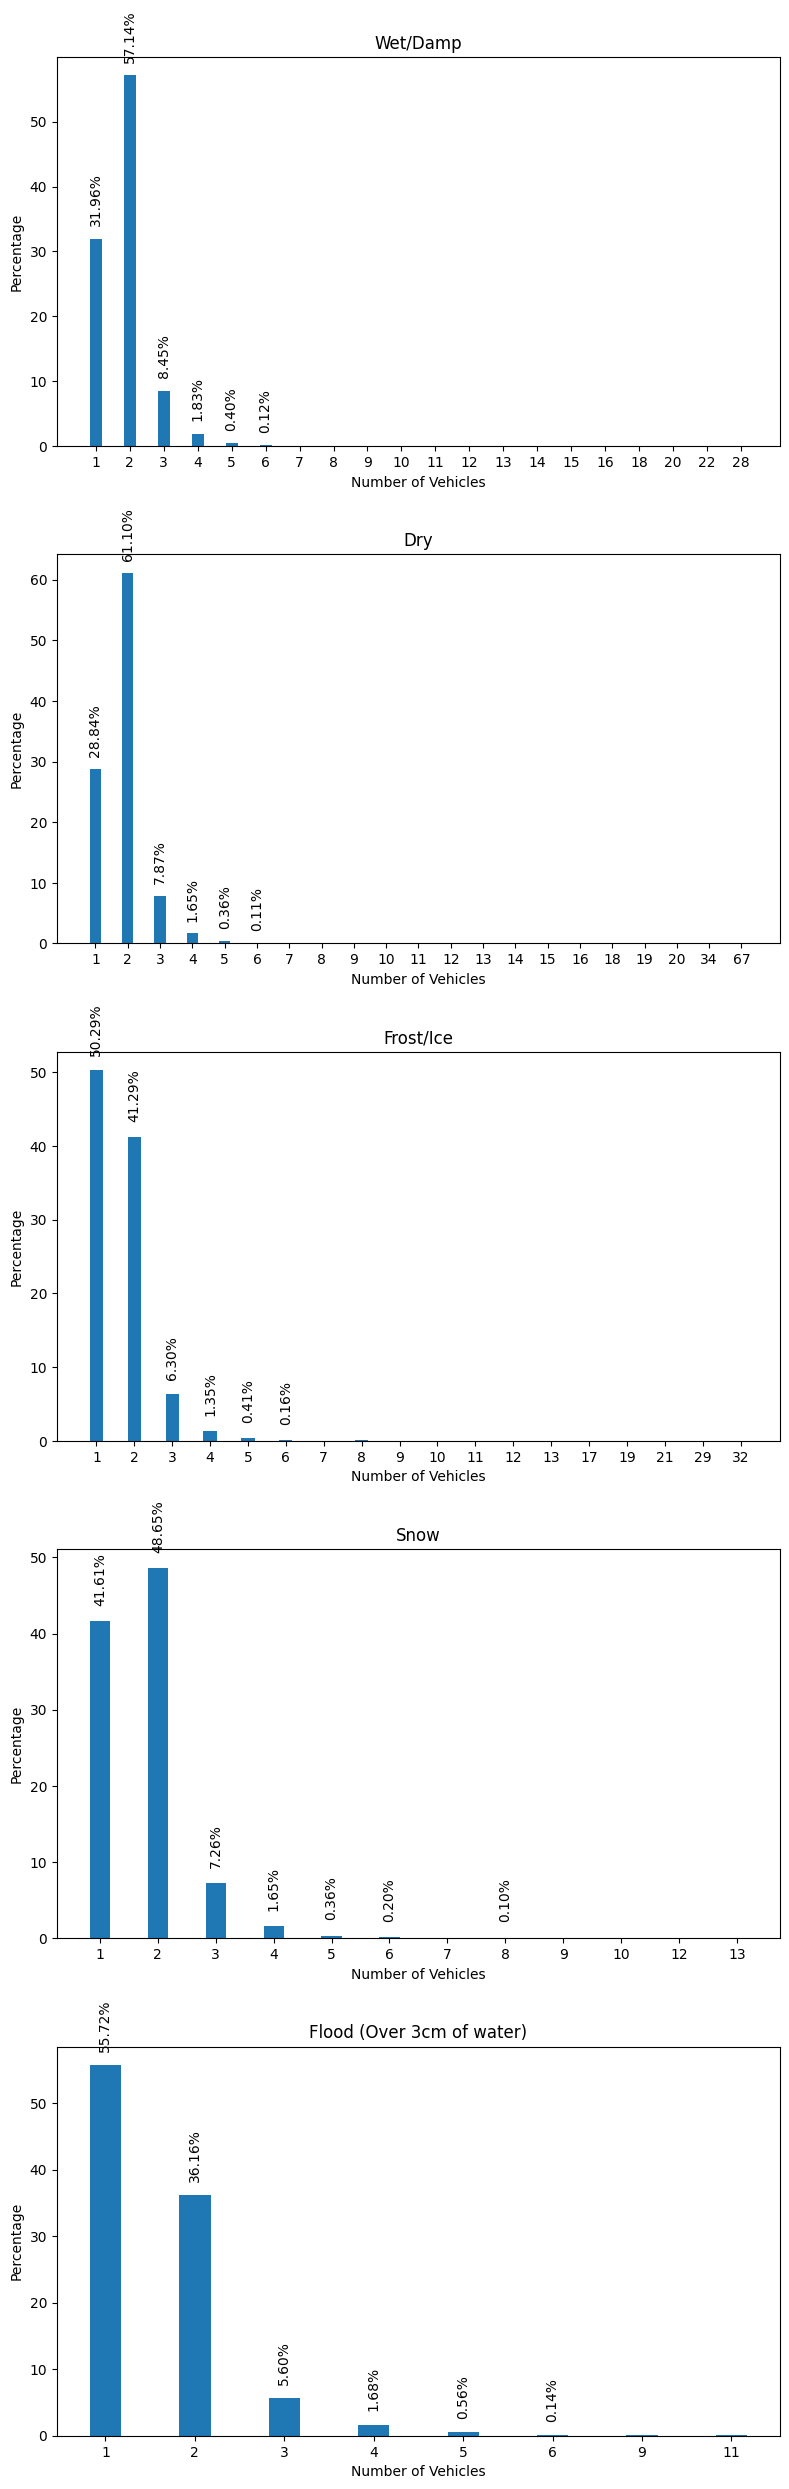

In [ ]:
categories = q1_accident['Road_Surface_Conditions'].dropna().unique()

bar_width = 0.35

# Define the threshold for percentage display
threshold = 0.1

# Define the height above the bars for the percentage labels
label_height = 2

# Create subplots for each category
fig, axs = plt.subplots(len(categories), figsize=(8, 5 * len(categories)))

# Iterate over each category and create a bar chart with percentages
for i, category in enumerate(categories):
    data = grouped.loc[category].dropna()
    total_count = data.sum()  # Calculate the total count
    percentages = (data / total_count) * 100  # Calculate the percentages

    # Sort the data by number of vehicles in ascending order
    data_sorted = data.sort_index()
    percentages_sorted = percentages.sort_index()

    ax = axs[i] if len(categories) > 1 else axs
    x = np.arange(len(data_sorted))  # Create an array of x-coordinates for each bar
    bars = ax.bar(x, percentages_sorted, width=bar_width)
    ax.set_title(category)
    ax.set_xlabel('Number of Vehicles')
    ax.set_ylabel('Percentage')
    ax.set_xticks(x)
    ax.set_xticklabels(data_sorted.index)

    # Add percentage labels above each bar if above the threshold and adjust vertical alignment and position
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if height > threshold:
            label_pos = height + label_height
            ax.annotate(f'{height:.2f}%', (bar.get_x() + bar.get_width() / 2, label_pos),
                        ha='center', va='bottom', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()








1 Vehicles in accident was most found in the condition 2
2 Vehicles in accident was most found in the condition 2
3 Vehicles in accident was most found in the condition 1
4 Vehicles in accident was most found in the condition 2
5 Vehicles in accident was most found in the condition 1


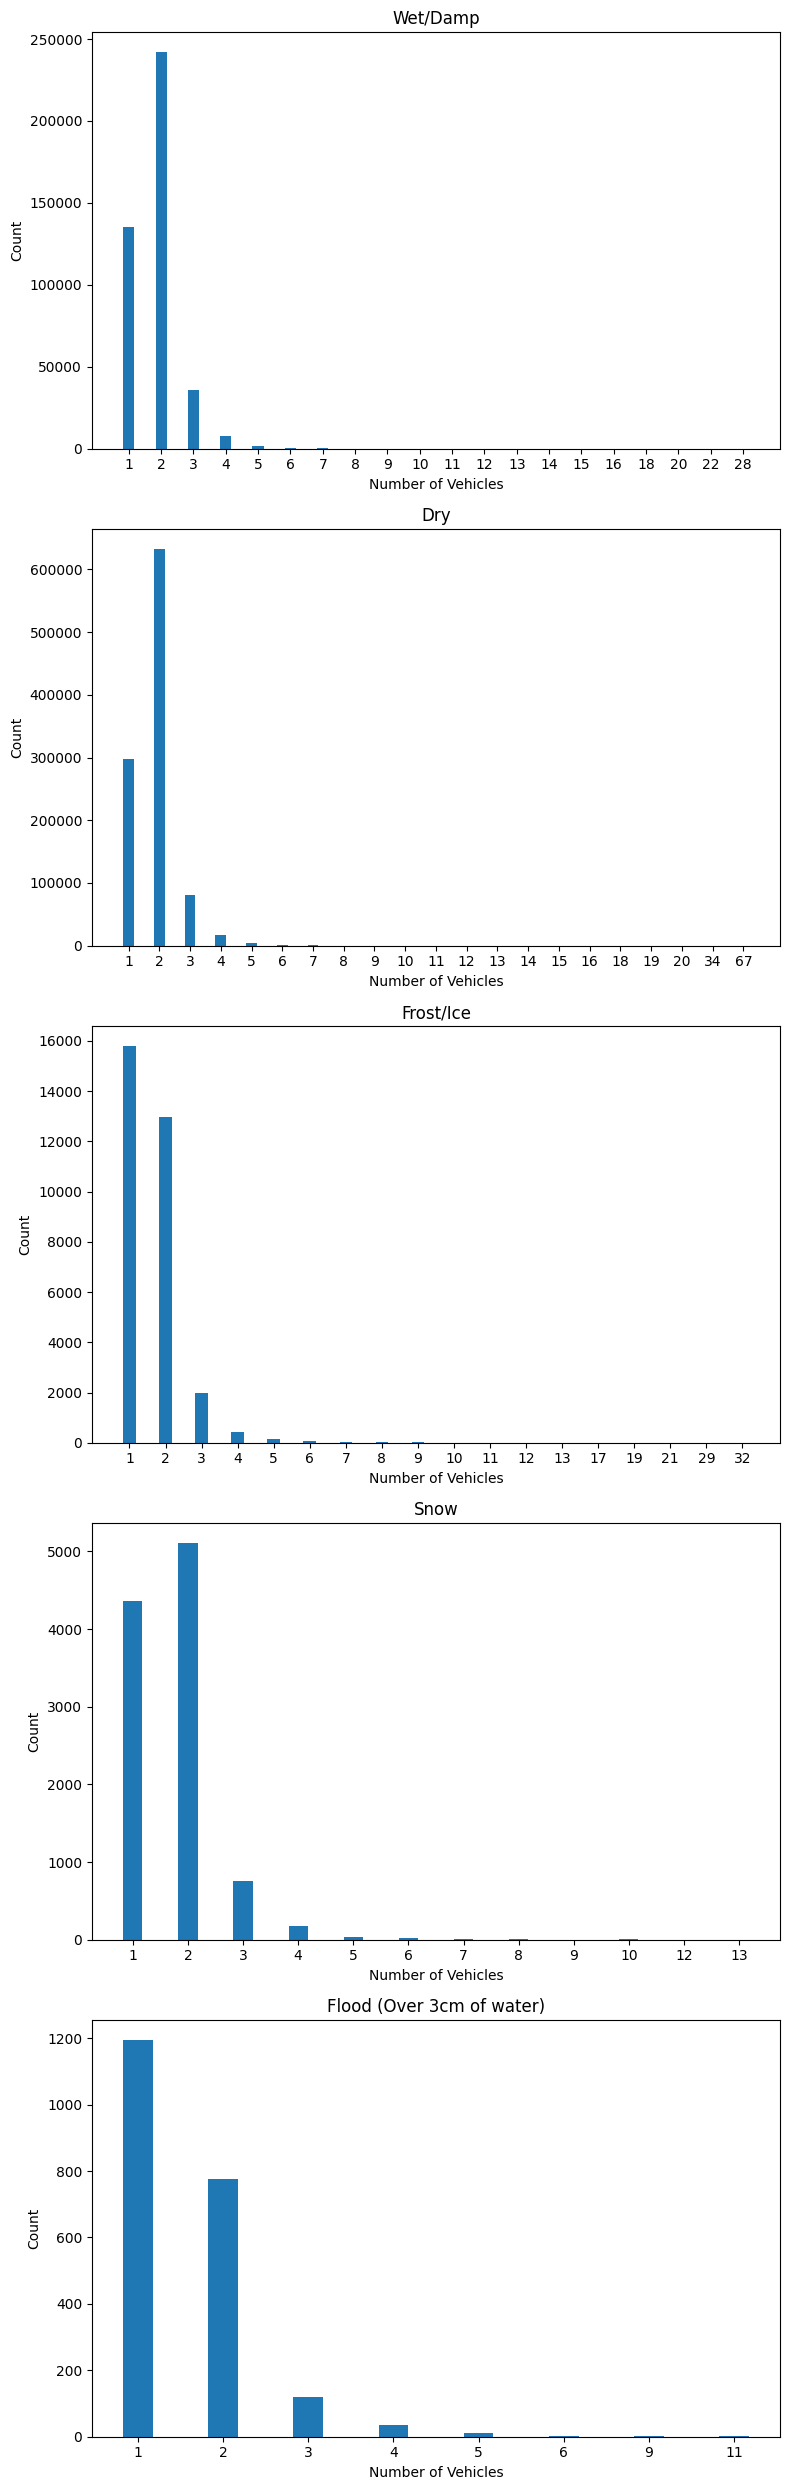

In [ ]:
q1_accident['Number_of_Vehicles'] = pd.to_numeric(q1_accident['Number_of_Vehicles'], errors='coerce')

# Group the data by 'Number_of_Vehicles' and 'Road_Surface_Conditions' and calculate the counts
grouped = q1_accident.groupby('Number_of_Vehicles')['Road_Surface_Conditions'].value_counts().unstack()

# Get the unique categories of 'Road_Surface_Conditions'
categories = q1_accident['Road_Surface_Conditions'].dropna().unique()

# Set the width of each bar
bar_width = 0.35

# Create subplots for each category
fig, axs = plt.subplots(len(categories), figsize=(8, 5 * len(categories)))

# List to store the road conditions with the highest count for each "Number of Vehicles" category
highest_counts = []

# Iterate over each category and create a bar chart with counts
for i, category in enumerate(categories):
    if category in grouped.columns:
        data = grouped[category].dropna()

        # Sort the data by number of vehicles in ascending order
        data_sorted = data.sort_index()

        ax = axs[i] if len(categories) > 1 else axs
        x = np.arange(len(data_sorted))  # Create an array of x-coordinates for each bar
        bars = ax.bar(x, data_sorted, width=bar_width)
        ax.set_title(category)
        ax.set_xlabel('Number of Vehicles')
        ax.set_ylabel('Count')
        ax.set_xticks(x)
        ax.set_xticklabels(data_sorted.index)

        # Find the road condition with the highest count
        max_count = data_sorted.max()
        highest_count_road_condition = data_sorted[data_sorted == max_count].index[0]
        highest_counts.append(highest_count_road_condition)

# Adjust spacing between subplots
plt.tight_layout()

# Print the road conditions with the highest count for each "Number of Vehicles" category
for i, highest_count_road_condition in enumerate(highest_counts):
    print(f"{i+1} Vehicles in accident was most found in the condition {highest_count_road_condition}")

# Display the plots
plt.show()

Here we can see that 3 of the counts showed that, wet/damp cause the most amount of 1, 2 and 4 vehicle collisions. It can be assumed that 1 vehicle collisions were caused due to bad road conditions, disallowing breaking, causing spin outs etc. Next we will look at the road conditions and if they had any effect on the severity of the accident.

In [16]:
severity_road = q1_accident[['Accident_Severity','Road_Surface_Conditions']]
severity_road.head(3)

,Accident_Severity,Road_Surface_Conditions
0,2,Wet/Damp
1,3,Dry
2,3,Dry


In [17]:
unique_values = severity_road['Accident_Severity'].unique()
print(unique_values)

[2 3 1]


It is assumed that the severity increases, with 1 being the lowest severity, and 3 being the highest severity.

In [18]:
grouped = severity_road.groupby('Accident_Severity')['Road_Surface_Conditions'].value_counts()
print(grouped)

Accident_Severity  Road_Surface_Conditions  
1                  Dry                           13032
                   Wet/Damp                       5956
                   Frost/Ice                       326
                   Snow                             74
                   Flood (Over 3cm of water)        41
2                  Dry                          143700
                   Wet/Damp                      55664
                   Frost/Ice                      3618
                   Snow                           1033
                   Flood (Over 3cm of water)       288
3                  Dry                          877938
                   Wet/Damp                     361857
                   Frost/Ice                     27461
                   Snow                           9390
                   Flood (Over 3cm of water)      1814
Name: Road_Surface_Conditions, dtype: int64


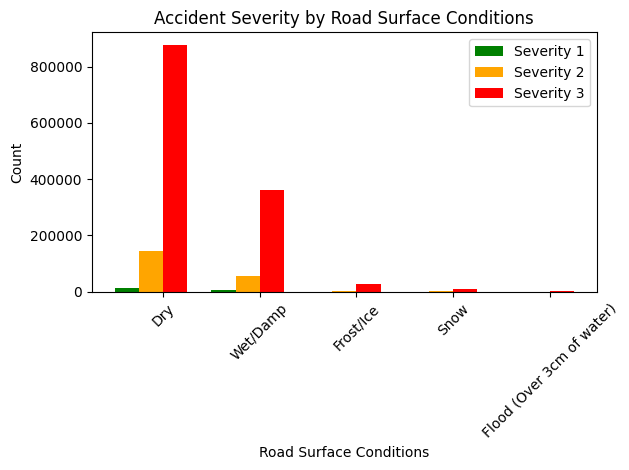

In [24]:

# Create a dictionary to store the colors for each severity level
severity_colors = {
    1: 'green',
    2: 'orange',
    3: 'red'
}

# Define the order of severity levels and road surface conditions
severity_order = [1, 2, 3]
road_conditions_order = ['Dry', 'Wet/Damp', 'Frost/Ice', 'Snow', 'Flood (Over 3cm of water)']

# Set the width of each bar
bar_width = 0.25

# Create the bar chart
fig, ax = plt.subplots()

# Iterate over each severity level
for severity in severity_order:
    # Get the data for the current severity level
    data = grouped[severity].reindex(road_conditions_order)

    # Create the x-coordinates for the bars
    x = np.arange(len(road_conditions_order)) + (severity - 1) * bar_width

    # Create the bars for the current severity level
    ax.bar(x, data, width=bar_width, label=f'Severity {severity}', color=severity_colors[severity])

# Set the x-axis labels and tick labels
ax.set_xlabel('Road Surface Conditions')
ax.set_ylabel('Count')
ax.set_xticks(np.arange(len(road_conditions_order)) + bar_width * 1.5)
ax.set_xticklabels(road_conditions_order, rotation=45)

# Add a legend
ax.legend()

# Set the title
ax.set_title('Accident Severity by Road Surface Conditions')

# Display the chart
plt.tight_layout()
plt.show()

From this graph, we can see that Accident severity was high when any weather conditions existed, even dry. From this, we can infer that the British population cannot drive.